In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from master import *

# Figure 2

Single cell, with (1) fixed, (2) homeostasis, and (3) Hebbian homeostasis. Population of 100 cells turning over 2x (200 "days"). Change features one at a time. 

<IPython.core.display.Javascript object>

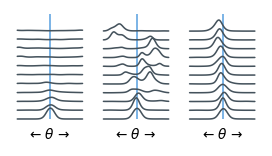

In [3]:
f2opts = {**options,
    'features' : 'oneatatime',
    'readout'  : 'circular1',
    'normalize': False,
    'saveall'  : True,
    'T'        : 200,
    'seed'     : 4, # Find a not-completely-stable seed
    'M'        : 4,
    'Δ'        : 1}
single_homeostat = run_experiment('homeostat',**{**f2opts,**rates['homeostat']})
single_hebbhomeo = run_experiment('hebbhomeo',**{**f2opts,**rates['hebbhomeo']})
# Collect results
W0,X,Y0,Y,W,R,G,B = single_homeostat
tsaved = arange(shape(X)[0]) * f2opts['Δ']
index  = 2
λ0 = sexp(einsum('km,tkl->tml',W0,X[[0]+[*tsaved],:,:]))[:,index,:]
λh = single_homeostat[3][:,index,:]
λb = single_hebbhomeo[3][:,index,:]
λ0,λh,λb = map(np.array,(λ0,λh,λb))
# Plot
NSHOW = 11
times = int32(round(linspace(0,f2opts['T']-1,NSHOW)))+1
figure(figsize=(2.25,1))
for j,Z in enumerate([λ0,λh,λb]):
    subplot(1,3,j+1)
    [plot(Z[t]+i*0.04,color=BLACK,lw=.8,clip_on=False) for i,t in enumerate(times)]
    noxyaxes(); 
    xlabel('← $\\theta$ →')
    ylim(0,(NSHOW+1)*0.04)
    axvline(f2opts['L']/2,color=AZURE,lw=.8,zorder=-inf)
savefigure('F2_right.svg',stamp=False)